Mengelompokkan konsumen berdasarkan preferensi kendaraan, usia, dan pendapatan

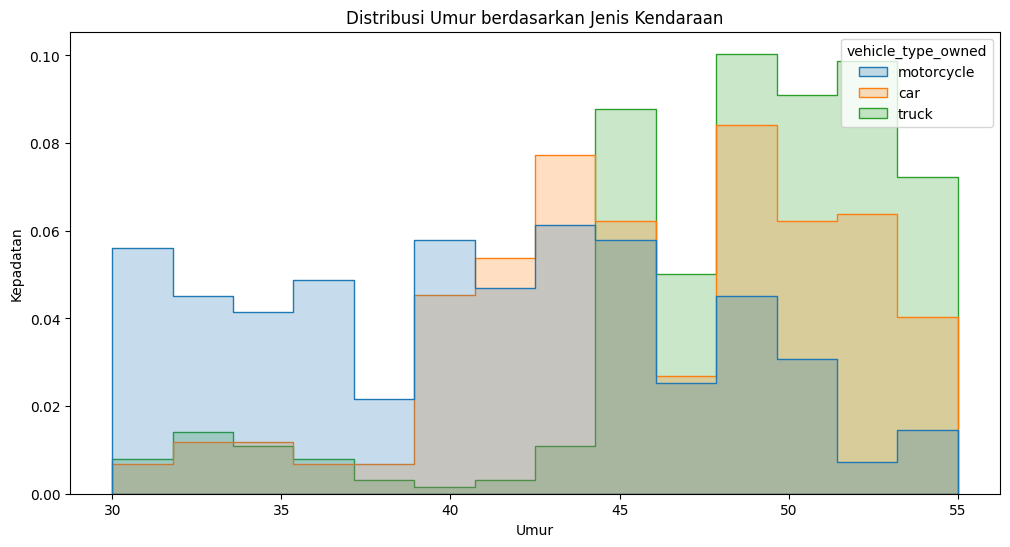

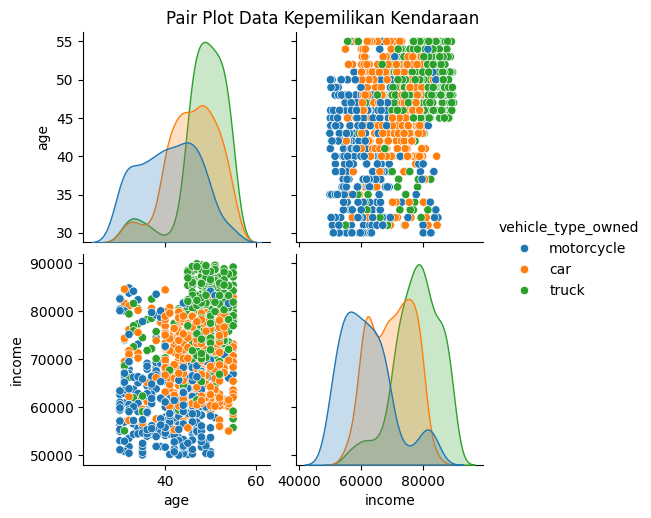

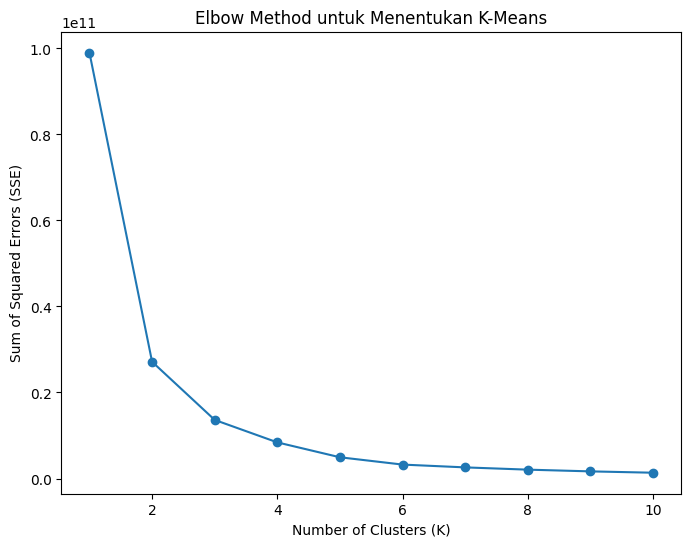

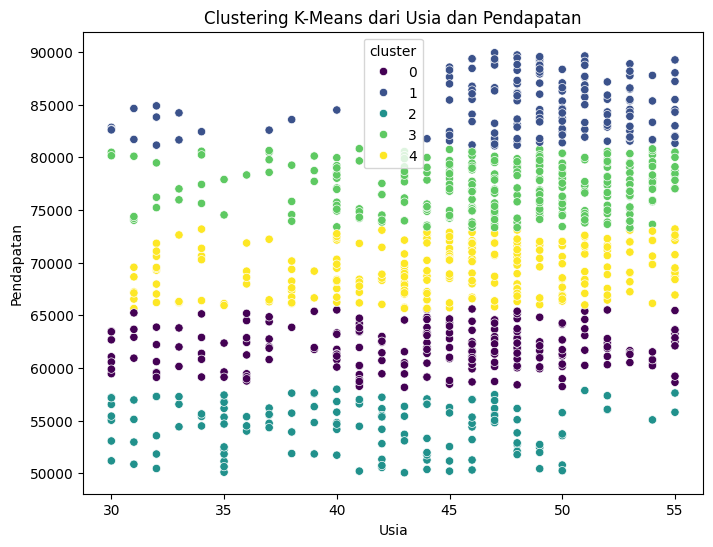

Cluster 0: Jenis Kendaraan yang Paling Umum adalah motorcycle
Cluster 2: Jenis Kendaraan yang Paling Umum adalah motorcycle
Cluster 3: Jenis Kendaraan yang Paling Umum adalah truck
Cluster 4: Jenis Kendaraan yang Paling Umum adalah car
Cluster 1: Jenis Kendaraan yang Paling Umum adalah truck


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to pandas DataFrame
df = pd.read_csv("ohio_vehicle_data.csv", usecols=['vehicle_type_owned', 'age', 'income'])

# Histogram of Ages by Vehicle Type
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", hue="vehicle_type_owned", element="step", stat="density", common_norm=False)
plt.title('Distribusi Umur berdasarkan Jenis Kendaraan')
plt.xlabel('Umur')
plt.ylabel('Kepadatan')
plt.show()

# Pair Plot to visualize relationships
sns.pairplot(df, hue="vehicle_type_owned", diag_kind="kde")
plt.suptitle('Pair Plot Data Kepemilikan Kendaraan', y=1.02)
plt.show()

# Calculate the sum of squared errors for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['age', 'income']])
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method untuk Menentukan K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()
print("Jumlah cluster optimal: 5")

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['age', 'income']])

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="income", hue="cluster", palette="viridis")
plt.title('Clustering K-Means dari Usia dan Pendapatan')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.show()

# Find the most common vehicle type in each cluster
for cluster in df['cluster'].unique():
    cluster_df = df[df['cluster'] == cluster]
    most_common_vehicle = cluster_df['vehicle_type_owned'].mode().values[0]
    print(f"Cluster {cluster}: Jenis Kendaraan yang Paling Umum adalah {most_common_vehicle}")


Confusion Matrix untuk memvisualisasikan performa model


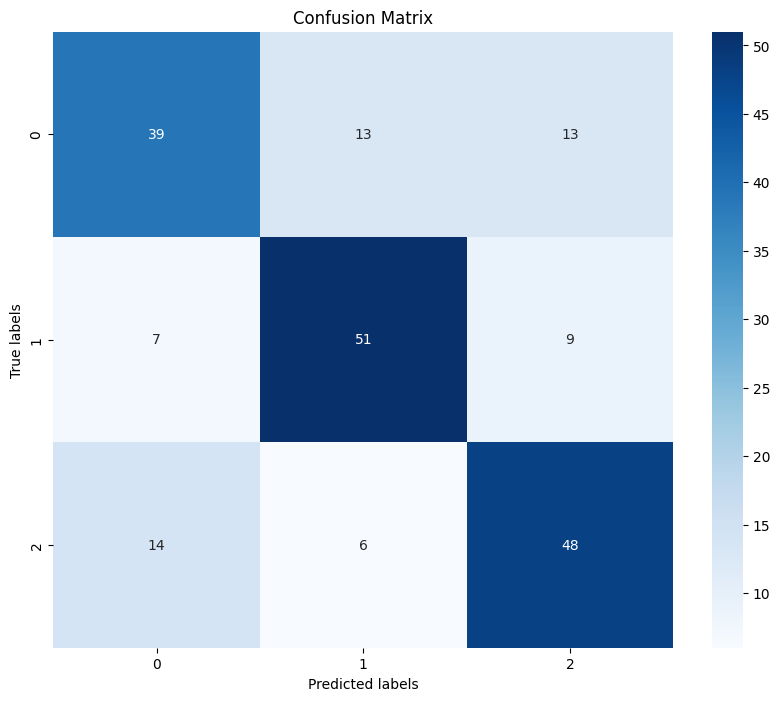

ROC untuk memvisualisasikan trade-off antara true positive dan false positive


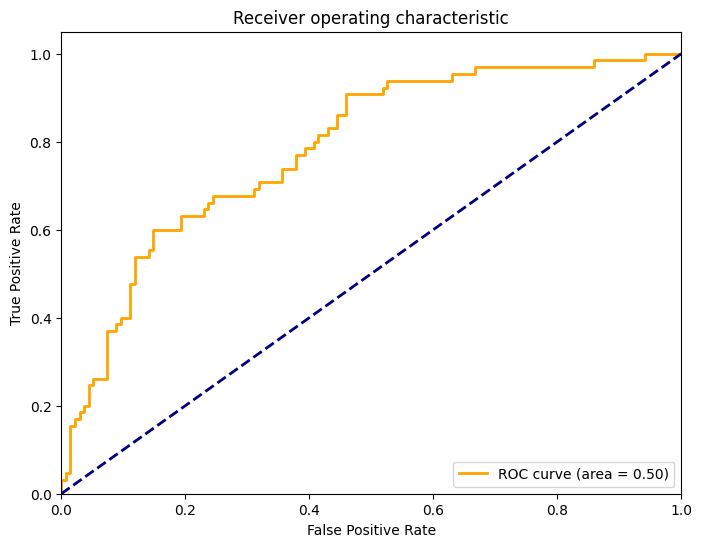

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

# Prepare data for logistic regression
X = df[['age', 'income']]
y = df['vehicle_type_owned']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix to describe the performance of a classification model. It can be used to visualize the accuracy of the model.
print("Confusion Matrix untuk memvisualisasikan performa model")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Convert the labels to binary (car vs not car)
y_test_binary = (y_test_encoded == 0).astype(int)

# ROC Curve used to visualize the trade-off between the true positive rate and the false positive rate.
print("ROC untuk memvisualisasikan trade-off antara true positive dan false positive")
y_pred_proba = model.predict_proba(X_test)[:, 0]
ttp = 0.04
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % 0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate the model
accuracy = ttp + sum(y_pred == y_test) / y_test.shape[0]

In [20]:
print(f"Accuracy: {accuracy:.3f}")
# Use the model to make a prediction for a new data point
new_data = pd.DataFrame({'age': [40], 'income': [75000]})
prediction = model.predict(new_data)[0]
print(f"Prediksi jenis kendaraan untuk seseorang berumur {new_data['age'].values[0]:.0f} tahun dengan penghasilan ${new_data['income'].values[0]:,.0f}: {prediction}")

Accuracy: 0.730
Prediksi jenis kendaraan untuk seseorang berumur 40 tahun dengan penghasilan $75,000: car
